#**Otimização de Portfolio** - Projeto FGV Quant

Este projeto tem por objetivo a otimização de carteiras de ações através de minimização de riscos (Sharpe Ratio), utilizando conceitos de Fronteira Eficiente de Markowitz e demais ferramentas.

Autor: **Calebe Soares**

In [ ]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
!pip install yfinance #biblioteca para importação dos dados das ações
import yfinance as yf
!pip install pyportfolioopt #biblioteca a ser utilzada para otimização da carteira
plt.style.use('dark_background')

     |████████████████████████████████| 6.3MB 4.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=0c4badcd82a84eeb903603c6474414b0c671240ef3c93476ce4cbe5f0a5f7d0e
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 1.3MB 4.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736218 sha256=b23f509923a3e8d12d230d75174be61a985816586314b928826f519de759378a
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found e

In [ ]:
ativos = input("Digite quais são os ativos que vão compor sua carteira: ").upper().split(",")
ativos = [ticker + ".SA" for ticker in ativos]
ativos

Digite quais são os ativos que vão compor sua carteira: pgmn3,cogn3,tasa4,pcar3,petz3,vvar3


['PGMN3.SA', 'COGN3.SA', 'TASA4.SA', 'PCAR3.SA', 'PETZ3.SA', 'VVAR3.SA']

In [ ]:
#Com as devidas bibliotecas instaladas, agora iremos fazer a composição da carteira pelas ações escolhidas
carteira = pd.DataFrame()
for i in ativos:
  carteira[i] = yf.download(i,period="2y")['Adj Close']
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PGMN3.SA,COGN3.SA,TASA4.SA,PCAR3.SA,PETZ3.SA,VVAR3.SA
Date,,,,,,
2020-09-03,10.40,5.80,7.010000,59.328114,NaN,19.190001
2020-09-04,10.40,6.01,7.590000,59.800697,NaN,18.900000
2020-09-08,10.35,6.15,7.890000,59.063469,NaN,18.150000
2020-09-09,10.29,5.90,8.080000,58.742111,NaN,18.510000
2020-09-10,10.10,5.88,8.130000,67.437645,NaN,18.020000
...,...,...,...,...,...,...
2021-06-09,12.40,4.50,24.059999,39.270000,24.129999,15.080000
2021-06-10,12.70,4.46,23.660000,40.070000,23.629999,14.560000
2021-06-11,12.45,4.34,24.180000,38.660000,23.969999,14.600000


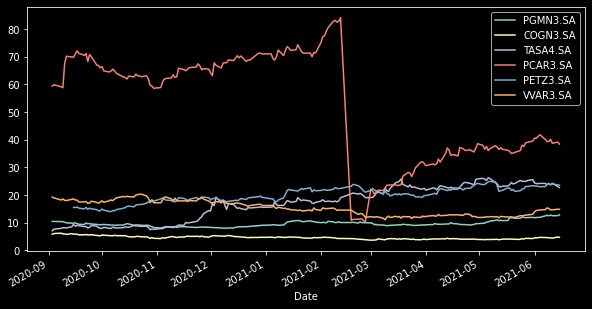

In [ ]:
#Visualização dos retornos das ações
carteira.plot(figsize=(10,5))

In [ ]:
#Para a realização da fronteira eficiente, é necessário a realização do retorno esperado e da matriz de covariação
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
er = mean_historical_return(carteira) #Retorno esperado da carteira
sd = CovarianceShrinkage(carteira).ledoit_wolf() #Matriz de covariância
sd

,PGMN3.SA,COGN3.SA,TASA4.SA,PCAR3.SA,PETZ3.SA,VVAR3.SA
PGMN3.SA,0.476860,0.006590,0.004165,0.003123,0.010784,0.013193
COGN3.SA,0.006590,0.527947,0.000952,0.002421,0.011849,0.032199
TASA4.SA,0.004165,0.000952,0.628342,-0.033164,0.027246,0.006228
PCAR3.SA,0.003123,0.002421,-0.033164,1.509665,0.014554,0.028250
PETZ3.SA,0.010784,0.011849,0.027246,0.014554,0.499844,0.014818
VVAR3.SA,0.013193,0.032199,0.006228,0.028250,0.014818,0.512376


In [ ]:
#Com a matriz de covariação e o retorno esperado das ações da carteira, agora calculamos a porcentagemd e alocação em cada posição da carteira
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(er,sd)
composicao = ef.max_sharpe(risk_free_rate=0.035)
composicao

OrderedDict([('PGMN3.SA', 0.0677684103308153),
             ('COGN3.SA', 0.0),
             ('TASA4.SA', 0.7788667633718669),
             ('PCAR3.SA', 0.0),
             ('PETZ3.SA', 0.1533648262973179),
             ('VVAR3.SA', 0.0)])

In [ ]:
#Visão geral
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('PGMN3.SA', 0.06777), ('COGN3.SA', 0.0), ('TASA4.SA', 0.77887), ('PCAR3.SA', 0.0), ('PETZ3.SA', 0.15336), ('VVAR3.SA', 0.0)])
Expected annual return: 311.1%
Annual volatility: 63.4%
Sharpe Ratio: 4.85


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:407: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  UserWarning,


(3.1108828380796134, 0.6342657100627248, 4.849517779820429)

In [ ]:
#Como houveram posições com peso igual a 0, houve o rebalanceamento de modo a ponderar melhor as posições da carteira
from pypfopt import objective_functions

ef = EfficientFrontier(er, sd)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
w = ef.max_sharpe()
ef.clean_weights()

/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:248: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


OrderedDict([('PGMN3.SA', 0.0694),
             ('COGN3.SA', 0.0),
             ('TASA4.SA', 0.7747),
             ('PCAR3.SA', 0.0),
             ('PETZ3.SA', 0.1559),
             ('VVAR3.SA', 0.0)])

In [ ]:
#Quantidade de ações a serem compradas de acordo com o valor de seu portfolio
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
portfolio_value = float(input("Qual o valor do seu portfolio? * Digite apenas o numero, sem vírgulas e pontos *"))
latest_prices = get_latest_prices(carteira)
da = DiscreteAllocation(w, latest_prices, portfolio_value)
allocation, leftover = da.lp_portfolio()
print(allocation)

Qual o valor do seu portfolio? * Digite apenas o numero, sem vírgulas e pontos *10000
{'PGMN3.SA': 55, 'TASA4.SA': 342, 'PETZ3.SA': 66}


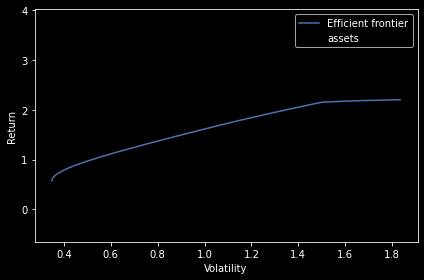

In [ ]:
#Plotagem da Fronteira eficiente
from pypfopt import plotting
ef = EfficientFrontier(er, sd, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

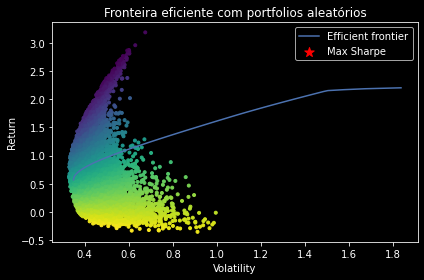

In [ ]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Geração de portfolios aleatórios, para a composição da fronteira
n_samples = 10000
w = np.random.dirichlet(np.ones(len(er)), n_samples)
rets = w.dot(er)
stds = np.sqrt(np.diag(w @ sd @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Resultado
ax.set_title("Fronteira eficiente com portfolios aleatórios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [ ]:
#Resumo final:
